<a href="https://colab.research.google.com/github/alinorouziani/simple-training-model-in-pytorch/blob/main/simple_training_model_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [62]:
weight = 0.9
bias = 0.5
x = torch.arange(0,1 , 0.02).unsqueeze(dim=1)
y = weight * x + bias

In [63]:
train_split = int(0.8 * len(x))
x_train = x[:train_split]
y_train = y[:train_split]
x_test = x[train_split:]
y_test = y[train_split:]

In [64]:
def plot_pridicts(train_data = x_train, train_label = y_train, test_data = x_test, test_label = y_test, prediction = None):
  plt.figure(figsize=(10,5))
  plt.scatter(train_data, train_label, c = 'b', s = 10, label = "Training Data:")
  plt.scatter(test_data, test_label, c = 'g', s = 10, label= "Test Data: ")
  if prediction is not None:
    plt.scatter(test_data, prediction, c = 'r', s = 10, label = "Prediction Data:" )
  plt.legend(prop={"size":14})

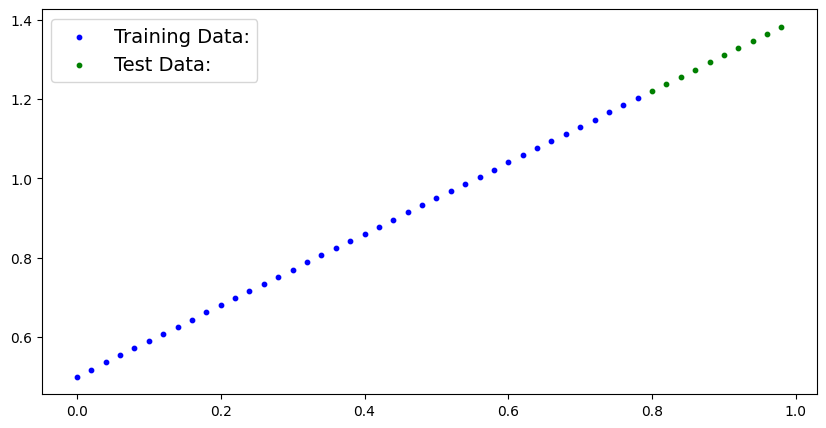

In [65]:
plot_pridicts()

In [66]:
class LinearRegression (nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1, requires_grad =True, dtype=torch.float))
    self.bais = nn.Parameter(torch.randn(1, requires_grad =True, dtype=torch.float))
  def forward(self, x : torch. Tensor) -> torch.Tensor:
    return self.weight * x + self.bais

In [67]:
torch.manual_seed(42)
model_0 = LinearRegression()
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bais', tensor([0.1288]))])

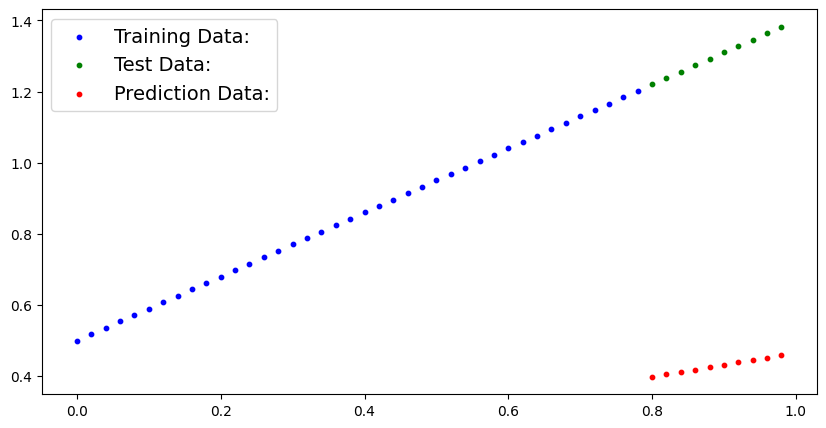

In [68]:
with torch.inference_mode():
  y_preds = model_0(x_test)
plot_pridicts(prediction = y_preds)

In [69]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params= model_0.parameters(), lr=0.1)

In [70]:
epochs = 1000
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model_0.train()
  y_preds = model_0(x_train)
  loss = loss_fn(y_preds, y_test)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_pred = model_0(x_test)
    test_loss = loss_fn(test_pred,y_test)
    test_loss_values.append(test_loss)
    #if epoch % 10 == 0:
      #print(f"Epoch: {epoch}, Test: {loss}, Test loss: {test_loss}")
      #print(model_0.state_dict())

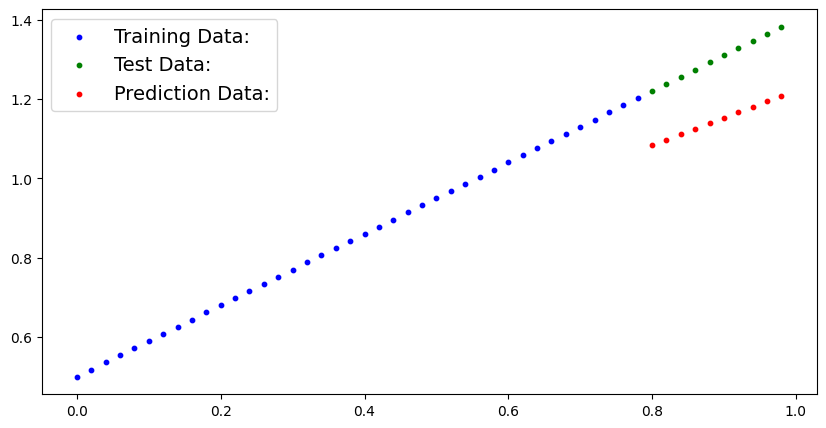

In [71]:
with torch.inference_mode():
  y_preds_new = model_0(x_test)
plot_pridicts(prediction = y_preds_new)